11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2846 - accuracy: 0.9189 - val_loss: 0.1649 - val_accuracy: 0.9507
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1289 - accuracy: 0.9619 - val_loss: 0.1194 - val_accuracy: 0.9650
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0886 - accuracy: 0.9732 - val_loss: 0.0992 - val_accuracy: 0.9697
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0655 - accuracy: 0.9808 - val_loss: 0.0907 - val_accuracy: 0.9721
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0523 - accuracy: 0.9839 - val_loss: 0.0850 - val_accuracy: 0.9754
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0399 - accuracy: 0.9880 - val_loss: 0.0891 - val_accuracy: 0.9743
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step -

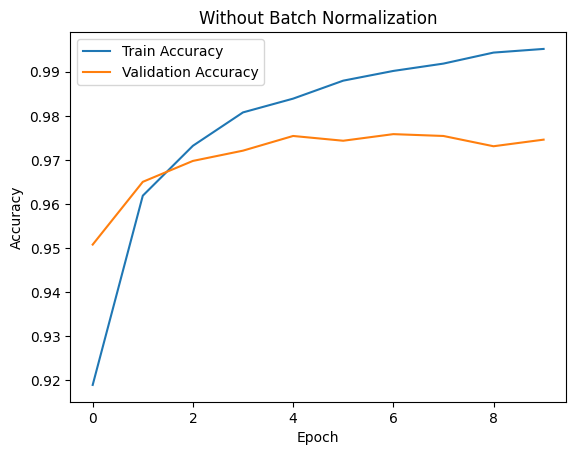

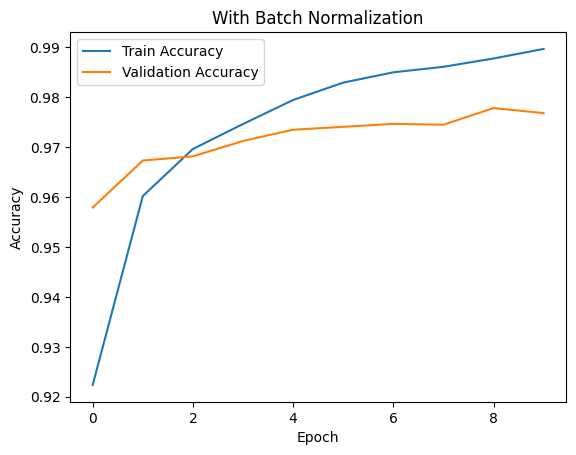

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2697 - accuracy: 0.9212 - val_loss: 0.1414 - val_accuracy: 0.9583
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1338 - accuracy: 0.9613 - val_loss: 0.1147 - val_accuracy: 0.9661
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0967 - accuracy: 0.9710 - val_loss: 0.0887 - val_accuracy: 0.9735
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0794 - accuracy: 0.9761 - val_loss: 0.0845 - val_accuracy: 0.9749
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0648 - accuracy: 0.9802 - val_loss: 0.0804 - val_accuracy: 0.9757


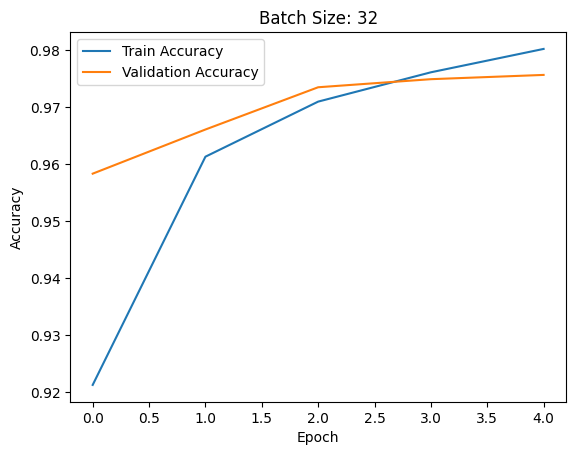

Epoch 1/5
750/750 [==============================] - 4s 5ms/step - loss: 0.2863 - accuracy: 0.9191 - val_loss: 0.1552 - val_accuracy: 0.9549
Epoch 2/5
750/750 [==============================] - 4s 6ms/step - loss: 0.1350 - accuracy: 0.9624 - val_loss: 0.1319 - val_accuracy: 0.9610
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0968 - accuracy: 0.9725 - val_loss: 0.1100 - val_accuracy: 0.9665
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0738 - accuracy: 0.9793 - val_loss: 0.0935 - val_accuracy: 0.9728
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0588 - accuracy: 0.9830 - val_loss: 0.0962 - val_accuracy: 0.9722


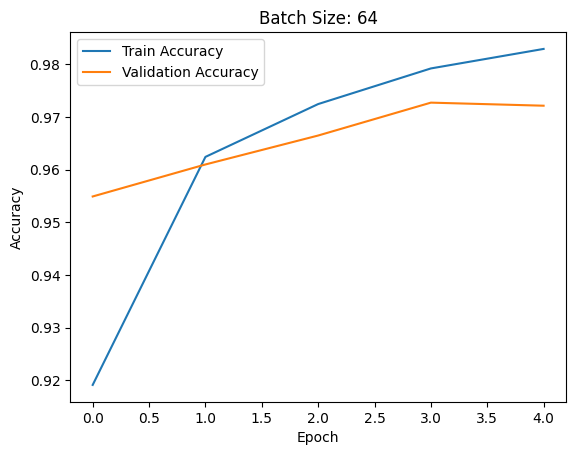

Epoch 1/5
375/375 [==============================] - 3s 6ms/step - loss: 0.3360 - accuracy: 0.9071 - val_loss: 0.1782 - val_accuracy: 0.9523
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1498 - accuracy: 0.9585 - val_loss: 0.1348 - val_accuracy: 0.9616
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1071 - accuracy: 0.9711 - val_loss: 0.1140 - val_accuracy: 0.9668
Epoch 4/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0823 - accuracy: 0.9775 - val_loss: 0.1068 - val_accuracy: 0.9688
Epoch 5/5
375/375 [==============================] - 2s 6ms/step - loss: 0.0635 - accuracy: 0.9828 - val_loss: 0.0940 - val_accuracy: 0.9710


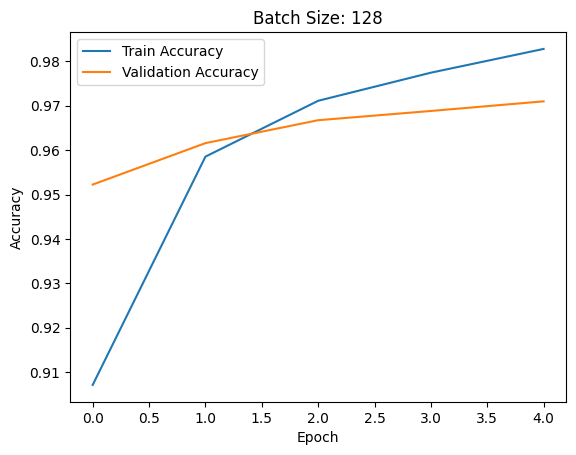

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from sklearn.model_selection import train_test_split

# Load a dataset (e.g., MNIST)
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Flatten the images
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define a simple feedforward neural network without batch normalization
def create_model_without_bn():
    model = models.Sequential([
        layers.InputLayer(input_shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a simple feedforward neural network with batch normalization
def create_model_with_bn():
    model = models.Sequential([
        layers.InputLayer(input_shape=(784,)),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model without batch normalization
model_without_bn = create_model_without_bn()
history_without_bn = model_without_bn.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Train the model with batch normalization
model_with_bn = create_model_with_bn()
history_with_bn = model_with_bn.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Compare training and validation performance
def plot_history(history, title):
    import matplotlib.pyplot as plt

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history_without_bn, 'Without Batch Normalization')
plot_history(history_with_bn, 'With Batch Normalization')

# Experiment with different batch sizes
batch_sizes = [32, 64, 128]
for batch_size in batch_sizes:
    model = create_model_with_bn()
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val), batch_size=batch_size)
    plot_history(history, f'Batch Size: {batch_size}')

# Discuss advantages and potential limitations in comments


## Qs. Theory and Concepts:-


**Explain the concept of batch normalization in the context of Artificial Neural Networks:**

Batch Normalization (BN) is a technique used in Artificial Neural Networks (ANNs) to improve the stability and speed of training. It operates by normalizing the inputs of each layer in a mini-batch before applying the activation function. This helps in addressing issues such as internal covariate shift, where the distribution of inputs to a layer changes during training.

In more detail, during training, the distribution of inputs to a layer can shift, causing difficulties for the learning process. Batch normalization aims to mitigate this by normalizing the inputs so that they have a mean of zero and standard deviation of one. This is done independently for each feature in the mini-batch. After normalization, the inputs are scaled and shifted using learnable parameters (gamma and beta) to allow the model to adapt and retain its representational capacity.

**Describe the benefits of using batch normalization during training:**

1. **Improved Convergence:**
   Batch normalization helps in speeding up the convergence of neural networks. By maintaining a stable distribution of inputs, it prevents the model from getting stuck during training and allows for faster convergence.

2. **Reduced Sensitivity to Initialization:**
   Batch normalization reduces the sensitivity of the network to weight initialization. This is particularly beneficial in deep networks, where getting the right initialization can be challenging.

3. **Mitigation of Vanishing and Exploding Gradients:**
   Batch normalization helps alleviate the vanishing and exploding gradient problems, making it easier to train deeper networks by ensuring a more consistent flow of gradients during backpropagation.

4. **Regularization Effect:**
   Batch normalization has a slight regularization effect, reducing the reliance on dropout or other regularization techniques. This can contribute to improved generalization performance.

5. **Allowance for Higher Learning Rates:**
   Batch normalization enables the use of higher learning rates during training, which can further accelerate the training process without compromising stability.

**Discuss the working principle of batch normalization, including the normalization step and the learnable parameters:**

1. **Normalization Step:**
   - For each feature in a mini-batch, calculate the mean and standard deviation.
   - Normalize the values by subtracting the mean and dividing by the standard deviation.
   - Scale and shift the normalized values using learnable parameters (gamma and beta).

2. **Learnable Parameters (Gamma and Beta):**
   - **Gamma (γ):** Scales the normalized values. It allows the model to learn the optimal scale for each feature.
   - **Beta (β):** Shifts the normalized values. It allows the model to learn the optimal shift for each feature.

The normalized and transformed values are then passed through the activation function and further layers of the neural network. During inference, batch normalization can use the aggregated statistics (mean and standard deviation) computed during training for normalization. The learnable parameters (gamma and beta) allow the model to adapt to the data distribution, providing flexibility in representation. Overall, batch normalization contributes to more stable and efficient training of neural networks.